# Sampling the Data

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
# Load data
epa_data = pd.read_csv(r"C:\Users\Lahari Reddy\Desktop\GoogleDA\Statistics\c2_epa_air_quality.csv", index_col = 0)

## Data Exploration

In [3]:
# First 10 rows of the data
epa_data.head(10)

,state_name,county_code,county_name,aqi,state_code_int,county_code_int
state_code,,,,,,
4,Arizona,13,Maricopa,18.0,4,13
4,Arizona,13,Maricopa,9.0,4,13
4,Arizona,19,Pima,20.0,4,19
6,California,1,Alameda,11.0,6,1
6,California,7,Butte,6.0,6,7
6,California,19,Fresno,11.0,6,19
6,California,29,Kern,7.0,6,29
6,California,29,Kern,3.0,6,29
6,California,29,Kern,7.0,6,29


In [4]:

epa_data.describe(include='all')

,state_name,county_code,county_name,aqi,state_code_int,county_code_int
count,1725,1725.000000,1725,1725.000000,1725.000000,1725.000000
unique,42,NaN,254,NaN,NaN,NaN
top,California,NaN,El Paso,NaN,NaN,NaN
freq,342,NaN,57,NaN,NaN,NaN
mean,NaN,83.939130,NaN,11.034783,26.595942,83.939130
std,NaN,118.027324,NaN,10.385993,18.702416,118.027324
min,NaN,1.000000,NaN,0.000000,1.000000,1.000000
25%,NaN,20.000000,NaN,5.000000,6.000000,20.000000
50%,NaN,55.000000,NaN,8.000000,26.000000,55.000000
75%,NaN,101.000000,NaN,15.000000,42.000000,101.000000


In [5]:
population_mean = epa_data['aqi'].mean()
population_mean

11.034782608695652

## Statistical tests

In [6]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

In [7]:
sampled_data.head(10)

,state_name,county_code,county_name,aqi,state_code_int,county_code_int
state_code,,,,,,
48,Texas,141,El Paso,2.0,48,141
35,New Mexico,1,Bernalillo,2.0,35,1
6,California,41,Marin,16.0,6,41
12,Florida,99,Palm Beach,14.0,12,99
51,Virginia,510,Alexandria City,8.0,51,510
80,Country Of Mexico,6,CHIHUAHUA STATE,25.0,80,6
36,New York,29,Erie,0.0,36,29
11,District Of Columbia,1,District of Columbia,22.0,11,1
25,Massachusetts,25,Suffolk,5.0,25,25


In [8]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

10.88

In [9]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

In [10]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,10.80
1,10.18
2,11.12
3,8.66
4,11.22
...,...
9995,11.68
9996,9.38
9997,12.76
9998,12.80


In [11]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

11.041020000000001

<Axes: >

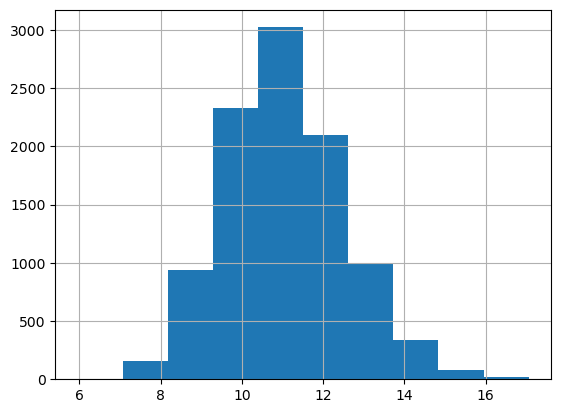

In [12]:
estimate_df['estimate'].hist()

In [13]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

1.332066064427737

## Results and Evaluation

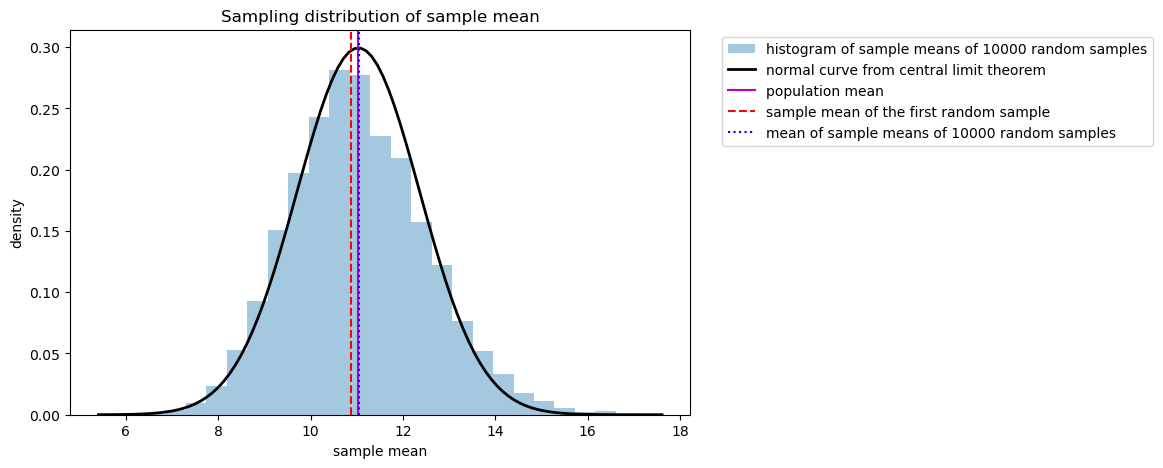

In [15]:
 # Generate a grid of 100 values from xmin to xmax.

plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

# Considerations

Sampling with replacement on a dataset leads to duplicate rows.
- Sample means are different from population means due to sampling variability.
- The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.